In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

### Exploring Data

In [3]:
file_path = 'melville-moby_dick.txt'

In [5]:

with open(file_path,'r') as f:
        text = f.read()
    

In [8]:
len(text)

1198622

In [11]:
print(text[1200:2000])

ound by
wharves as Indian isles by coral reefs--commerce surrounds it with
her surf.  Right and left, the streets take you waterward.  Its
extreme downtown is the battery, where that noble mole is washed by
waves, and cooled by breezes, which a few hours previous were out of
sight of land.  Look at the crowds of water-gazers there.

Circumambulate the city of a dreamy Sabbath afternoon.  Go from
Corlears Hook to Coenties Slip, and from thence, by Whitehall,
northward.  What do you see?--Posted like silent sentinels all around
the town, stand thousands upon thousands of mortal men fixed in ocean
reveries.  Some leaning against the spiles; some seated upon the
pier-heads; some looking over the bulwarks of ships from China; some
high aloft in the rigging, as if striving to get a still better



In [13]:
unique_char = sorted(set(text))
unique_char

['\n',
 ' ',
 '!',
 '"',
 '$',
 '&',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [14]:
len(unique_char)

81

In [15]:
char_to_index = {char:index for index,char in enumerate(unique_char)}

In [29]:
char_to_index['X']

49

In [19]:
# converting dict to np array
index_to_char = np.array(unique_char)

In [21]:
index_to_char[49]

'X'

In [22]:
# encoding all the text 
encoded_text = np.array([char_to_index[i] for i in text])

In [25]:
encoded_text[:200]

array([28, 33, 26, 41, 45, 30, 43,  1, 14,  0,  0, 37, 69, 69, 67, 63, 68,
       61, 73, 12,  0,  0,  0, 28, 55, 66, 66,  1, 67, 59,  1, 34, 73, 62,
       67, 55, 59, 66, 12,  1,  1, 44, 69, 67, 59,  1, 79, 59, 55, 72, 73,
        1, 55, 61, 69, 11, 11, 68, 59, 76, 59, 72,  1, 67, 63, 68, 58,  1,
       62, 69, 77,  1, 66, 69, 68, 61,  0, 70, 72, 59, 57, 63, 73, 59, 66,
       79, 11, 11, 62, 55, 76, 63, 68, 61,  1, 66, 63, 74, 74, 66, 59,  1,
       69, 72,  1, 68, 69,  1, 67, 69, 68, 59, 79,  1, 63, 68,  1, 67, 79,
        1, 70, 75, 72, 73, 59, 10,  1, 55, 68, 58,  1, 68, 69, 74, 62, 63,
       68, 61,  0, 70, 55, 72, 74, 63, 57, 75, 66, 55, 72,  1, 74, 69,  1,
       63, 68, 74, 59, 72, 59, 73, 74,  1, 67, 59,  1, 69, 68,  1, 73, 62,
       69, 72, 59, 10,  1, 34,  1, 74, 62, 69, 75, 61, 62, 74,  1, 34,  1,
       77, 69, 75, 66, 58,  1, 73, 55, 63, 66,  1, 55, 56])

In [24]:
encoded_text.shape

(1198622,)

In [27]:
print(text[:200])

CHAPTER 1

Loomings.


Call me Ishmael.  Some years ago--never mind how long
precisely--having little or no money in my purse, and nothing
particular to interest me on shore, I thought I would sail ab


### Creating Batches

In [30]:
# first we choose length of the sequence from text
print(text[2000:3000])

seaward peep.  But these are all landsmen; of week days pent up in
lath and plaster--tied to counters, nailed to benches, clinched to
desks.  How then is this?  Are the green fields gone?  What do they
here?

But look! here come more crowds, pacing straight for the water, and
seemingly bound for a dive.  Strange!  Nothing will content them but
the extremest limit of the land; loitering under the shady lee of
yonder warehouses will not suffice.  No.  They must get just as nigh
the water as they possibly can without falling in.  And there they
stand--miles of them--leagues.  Inlanders all, they come from lanes
and alleys, streets and avenues--north, east, south, and west.  Yet
here they all unite.  Tell me, does the magnetic virtue of the
needles of the compasses of all those ships attract them thither?

Once more.  Say you are in the country; in some high land of lakes.
Take almost any path you please, and ten to one it carries you down
in a dale, and leaves you there by a pool in the s

In [31]:
parag_len = """
But look! here come more crowds, pacing straight for the water, and
seemingly bound for a dive.  Strange!  Nothing will content them but
the extremest limit of the land; loitering under the shady lee of
yonder warehouses will not suffice.  No.  They must get just as nigh
the water as they possibly can without falling in.  And there they
stand--miles of them--leagues.  Inlanders all, they come from lanes
and alleys, streets and avenues--north, east, south, and west.  Yet
here they all unite.  Tell me, does the magnetic virtue of the
needles of the compasses of all those ships attract them thither?
"""

In [32]:
len(parag_len)

605

In [33]:
sentence = """
 Strange!  Nothing will content them but
the extremest limit of the land; loitering under the shady lee of
yonder warehouses will not suffice. 
"""

In [34]:
len(sentence)

145

In [35]:
sequence_len = 150

In [36]:
total_number_sequence = len(text)//(sequence_len+1)

In [37]:
total_number_sequence

7937

In [38]:
char_dataset = tf.data.Dataset.from_tensor_slices(encoded_text)

In [42]:
# the batch method converts these individual character calls into sequences we can feed in as a batch
for item in char_dataset.take(200):
    print(index_to_char[item.numpy()])

C
H
A
P
T
E
R
 
1




L
o
o
m
i
n
g
s
.






C
a
l
l
 
m
e
 
I
s
h
m
a
e
l
.
 
 
S
o
m
e
 
y
e
a
r
s
 
a
g
o
-
-
n
e
v
e
r
 
m
i
n
d
 
h
o
w
 
l
o
n
g


p
r
e
c
i
s
e
l
y
-
-
h
a
v
i
n
g
 
l
i
t
t
l
e
 
o
r
 
n
o
 
m
o
n
e
y
 
i
n
 
m
y
 
p
u
r
s
e
,
 
a
n
d
 
n
o
t
h
i
n
g


p
a
r
t
i
c
u
l
a
r
 
t
o
 
i
n
t
e
r
e
s
t
 
m
e
 
o
n
 
s
h
o
r
e
,
 
I
 
t
h
o
u
g
h
t
 
I
 
w
o
u
l
d
 
s
a
i
l
 
a
b


In [44]:
sequences = char_dataset.batch(sequence_len+1,drop_remainder=True) # +1 becouse it is zero indexing

In [45]:
# now next step is creating target text sequence, first grab the input text sequence, assign the target
# text sequence as the input text
# sequence shifted by one step foward and then grouped them together as tuple

#seq=[1,2,3,4,5]
def create_sequence_target(seq):
    input_text = seq[:-1] # [1,2,3,4]
    target_text = seq[1:] # [2,3,4,5]
    return input_text,target_text

In [49]:
dataset = sequences.map(create_sequence_target)

In [50]:
# check the results of one batch size
for input_text,target_text in dataset.take(1):
    print(input_text.numpy())
    print("".join(index_to_char[input_text.numpy()]))
    print("\n")
    print(target_text.numpy())
    print("".join(index_to_char[target_text.numpy()]))

[28 33 26 41 45 30 43  1 14  0  0 37 69 69 67 63 68 61 73 12  0  0  0 28
 55 66 66  1 67 59  1 34 73 62 67 55 59 66 12  1  1 44 69 67 59  1 79 59
 55 72 73  1 55 61 69 11 11 68 59 76 59 72  1 67 63 68 58  1 62 69 77  1
 66 69 68 61  0 70 72 59 57 63 73 59 66 79 11 11 62 55 76 63 68 61  1 66
 63 74 74 66 59  1 69 72  1 68 69  1 67 69 68 59 79  1 63 68  1 67 79  1
 70 75 72 73 59 10  1 55 68 58  1 68 69 74 62 63 68 61  0 70 55 72 74 63
 57 75 66 55 72  1]
CHAPTER 1

Loomings.


Call me Ishmael.  Some years ago--never mind how long
precisely--having little or no money in my purse, and nothing
particular 


[33 26 41 45 30 43  1 14  0  0 37 69 69 67 63 68 61 73 12  0  0  0 28 55
 66 66  1 67 59  1 34 73 62 67 55 59 66 12  1  1 44 69 67 59  1 79 59 55
 72 73  1 55 61 69 11 11 68 59 76 59 72  1 67 63 68 58  1 62 69 77  1 66
 69 68 61  0 70 72 59 57 63 73 59 66 79 11 11 62 55 76 63 68 61  1 66 63
 74 74 66 59  1 69 72  1 68 69  1 67 69 68 59 79  1 63 68  1 67 79  1 70
 75 72 73 59 10  1 55 68

In [57]:
# Specify the batch size
batch_size = 128

In [58]:
buffer_size = 10000

dataset=dataset.shuffle(buffer_size=buffer_size).batch(batch_size,drop_remainder=True)

In [59]:
dataset

<BatchDataset shapes: ((128, 150), (128, 150)), types: (tf.int32, tf.int32)>

### Creating the Model

In [63]:
# unique char size
char_num = len(unique_char)
char_num

81

In [64]:
# Embedding Dimension for the embedding layer
embed_dim = 64

In [65]:
rnn_neurons = 1024

In [68]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense

In [67]:
def sparse_cat_loss(y_true,y_pred):
    return sparse_categorical_crossentropy(y_true,y_pred,from_logits=True)

In [69]:
def create_model(char_num,embed_dim,rnn_neurons,batch_size):
    model = Sequential()
    model.add(Embedding(char_num,embed_dim,batch_input_shape=[batch_size,None]))
    model.add(GRU(rnn_neurons,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'))
    model.add(Dense(char_num))
    
    model.compile(optimizer='adam',loss=sparse_cat_loss)
    return model

In [70]:
model = create_model(
    char_num=char_num,
    embed_dim=embed_dim,
    rnn_neurons=rnn_neurons,
    batch_size=batch_size
)

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (128, None, 64)           5184      
                                                                 
 gru (GRU)                   (128, None, 1024)         3348480   
                                                                 
 dense (Dense)               (128, None, 81)           83025     
                                                                 
Total params: 3,436,689
Trainable params: 3,436,689
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [72]:
epochs = 30
model.fit(dataset,epochs=epochs)

Epoch 1/30
62/62 [==============================] - 79s 1s/step - loss: 3.3799
Epoch 2/30
62/62 [==============================] - 73s 1s/step - loss: 2.6368
Epoch 3/30
62/62 [==============================] - 74s 1s/step - loss: 2.3788
Epoch 4/30
62/62 [==============================] - 73s 1s/step - loss: 2.2469
Epoch 5/30
62/62 [==============================] - 73s 1s/step - loss: 2.1169
Epoch 6/30
62/62 [==============================] - 73s 1s/step - loss: 2.0005
Epoch 7/30
62/62 [==============================] - 74s 1s/step - loss: 1.9017
Epoch 8/30
62/62 [==============================] - 75s 1s/step - loss: 1.8172
Epoch 9/30
62/62 [==============================] - 73s 1s/step - loss: 1.7418
Epoch 10/30
62/62 [==============================] - 74s 1s/step - loss: 1.6749
Epoch 11/30
62/62 [==============================] - 75s 1s/step - loss: 1.6197
Epoch 12/30
62/62 [==============================] - 73s 1s/step - loss: 1.5705
Epoch 13/30
62/62 [==============================

In [73]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

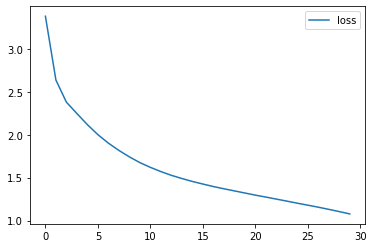

In [74]:
loss.plot()

In [86]:
def generate_text(model,start_seed,gen_size=500,temp=1.0):
    
    temperature = temp
    
    text_generator = []
        
    num_generate = gen_size
    
    input_eval = [char_to_index[i] for i in start_seed]
    
    input_eval = tf.expand_dims(input_eval,0)
    
    model.reset_states()
    
    for j in range(num_generate):
        
        predictions = model(input_eval)
        
        predictions = tf.squeeze(predictions,0)
        
        predictions = predictions/temperature
        
        predictions_id = tf.random.categorical(predictions,num_samples=1)[-1,0].numpy()
        
        input_eval = tf.expand_dims([predictions_id],0)
        
        text_generator.append(index_to_char[predictions_id])
    return (start_seed+"".join(text_generator))   
   

In [83]:
from tensorflow.keras.models import save_model,load_model

In [84]:
model.save('moby_model.h5')

In [91]:
model = create_model(char_num,embed_dim,rnn_neurons,batch_size=1)

model.load_weights('moby_model.h5')

model.build(tf.TensorShape([1,None]))

In [92]:
print(generate_text(model,'Moby',gen_size=1000))

Moby
Ohero's mouths--indolent any missens on lapid him up, and
influenced with eatung side of which I said it over my compass.  "Onse explail, were miles;--but that's too lut the captain as
an infisid, bothing of
such a flame of four or form, man; whot use their distance, ahay wor to the bows of Porpoise.  In those things haw Quohog thought without you; well, so down as much,'s a
dranto conclude yourself; cursed from off sudden, and on um jadge to come
from bidding at last-men, two harpless annumanter in the lower of the Steed Cattain was somewhat living aloft
crossed the side fixed, whose vicinity of
resorning this motion
of one denieemen, descended in any bereast
he extent.

As for those disgains the side, and not use you so cloced and rough the diencely doablier, duny do they leave our innerpose for the nose of this fine; ropeptian English froming through my soul stered worshipped, but Little man thus more out of ye, but that a
Custern of Weale, rounded Rathat Captain one quofog the